# ÂØºÂåÖ‰∏éÊï∞ÊçÆ

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn import cluster
from sklearn import manifold 
from sklearn import metrics

from scipy.stats import norm
from  scipy import stats
from scipy.stats import pearsonr

# ÁîªÊºèÊñóÂõæ
from pyecharts import options as opts
from pyecharts.charts import Funnel

#  Ëß£ÂÜ≥Ê±âÂ≠óÊòæÁ§∫‰∏çÂá∫Êù•ÁöÑÈóÆÈ¢òÔºàËÆæÁΩÆ‰∏∫Ê•∑‰ΩìÔºâ
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['KaiTi']

In [2]:
info = pd.read_csv("user_info_format1.csv") # Áî®Êà∑‰ø°ÊÅØË°®

In [3]:
log = pd.read_csv("user_log_format1.csv") # Áî®Êà∑Ë°å‰∏∫Ë°®

# Êï∞ÊçÆËØ¥Êòé

Êú¨È°πÁõÆÁöÑÊï∞ÊçÆÊù•Ê∫ê‰∫éÈòøÈáåÂ§©Ê±†Âπ≥Âè∞„ÄÇÊï∞ÊçÆÊù•Ê∫êÂÆòÁΩëÔºöhttps://tianchi.aliyun.com/dataset/dataDetail?dataId=42


Êú¨È°πÁõÆÁöÑÊï∞ÊçÆËÆ∞ÂΩï‰∫Ü2015Âπ¥05Êúà11Êó•-2015Âπ¥11Êúà11Êó•ÊúüÈó¥ÊØè‰∏ÄÂ§©ÊØè‰∏Ä‰∏™Ê∑òÂÆùÁî®Êà∑ÁöÑ**Ë°å‰∏∫**ÔºàÁÇπÂáªÔºåÊî∂ËóèÔºåÂä†Ë¥≠ÔºåË¥≠‰π∞ÔºâÔºå‰ª•ÂèäËøô‰∫õÁî®Êà∑ÁöÑÂÖ∑‰Ωì**‰ø°ÊÅØ**ÔºàÊÄßÂà´ÔºåÂπ¥ÈæÑÔºâ.


Êú¨È°πÁõÆÂÖ±‰ΩøÁî®‰∫Ü‰∏§‰∏™Ë°®"user_info_format1.csv"(Á∫¶42‰∏áË°åÊï∞ÊçÆ)‰∏é"user_log_format1.csv"(Á∫¶5ÂçÉ‰∏áË°åÊï∞ÊçÆ)ÔºåÊØè‰∏™Ë°®Â≠óÊÆµÁöÑÂÖ∑‰ΩìËØ¥ÊòéÂèÇËßÅÊï∞ÊçÆÊù•Ê∫êÂÆòÁΩëÊàñ"README.md".

In [4]:
info

user_id  age_range  gender
0        376517        6.0     1.0
1        234512        5.0     0.0
2        344532        5.0     0.0
3        186135        5.0     0.0
4         30230        5.0     0.0
...         ...        ...     ...
424165   395814        3.0     1.0
424166   245950        0.0     1.0
424167   208016        NaN     NaN
424168   272535        6.0     1.0
424169    18031        3.0     1.0

[424170 rows x 3 columns]

In [5]:
log

user_id  item_id  cat_id  seller_id  brand_id  time_stamp  \
0          328862   323294     833       2882    2661.0         829   
1          328862   844400    1271       2882    2661.0         829   
2          328862   575153    1271       2882    2661.0         829   
3          328862   996875    1271       2882    2661.0         829   
4          328862  1086186    1271       1253    1049.0         829   
...           ...      ...     ...        ...       ...         ...   
54925325   208016   107662     898       1346    7995.0        1110   
54925326   208016  1058313     898       1346    7995.0        1110   
54925327   208016   449814     898        983    7995.0        1110   
54925328   208016   634856     898       1346    7995.0        1110   
54925329   208016   272094     898       1346    7995.0        1111   

          action_type  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  
...               ...  
54925325            0  
54925326            0  
54925327            0  
54925328            0  
54925329            0  

[54925330 rows x 7 columns]

In [6]:
print(log.shape[0]) #Êü•ÁúãË°åÊï∞
print(log.shape[1]) # Êü•ÁúãÂàóÊï∞
print(log.dtypes) # Êü•ÁúãÊï∞ÊçÆÁ±ªÂûã

54925330
7
user_id          int64
item_id          int64
cat_id           int64
seller_id        int64
brand_id       float64
time_stamp       int64
action_type      int64
dtype: object


# Êï∞ÊçÆÈ¢ÑÂ§ÑÁêÜ

## ÈöèÊú∫ÂèñÊ†∑

logË°®ÁöÑÊï∞ÊçÆÊúâ‰∫îÂçÉÂ§ö‰∏áÊù°ÔºåË∑ëËµ∑Êù•ËµÑÊ∫êÁÆ°ÁêÜÂô®ÊÄªÊòØÁÇ∏Êéâ„ÄÇÊó†Â•à‰πã‰∏ãÂè™Â•Ω‰ªélogË°®‰∏≠ÈöèÊú∫ÂèñÊ†∑‰∫Ü„ÄÇ

ÂÖ∑‰ΩìÂÅöÊ≥ïÔºö‰∏∫‰∫Ü‰øùËØÅÊØè‰∏™Áî®Êà∑Ë°å‰∏∫ËÆ∞ÂΩï‰∏çÂáèÂ∞ëÂ§™Â§öÔºåÊàë‰ª¨Âè™‰ªéinfoË°®‰∏≠Âèñ1%ÁöÑÁî®Êà∑Ôºà4242‰∏™Áî®Êà∑ÔºâÂá∫Êù•„ÄÇÁÑ∂ÂêéÊ†πÊçÆËøô‰∫õÁî®Êà∑ÂÜç‰ªélogÈáåÈÄâÁõ∏Â∫îÁöÑÁî®Êà∑„ÄÇ

In [7]:
info = info.sample(frac = 0.01) # ‰ªéinfoË°®‰∏≠ÈöèÊú∫Âèñ1%
userid = info.user_id # ÂèñÂá∫ÈÄâÂá∫Êù•ÁöÑuserid
log1 = log[log['user_id'].isin(userid)]#Ê†πÊçÆÈÄâÂá∫Êù•ÁöÑuseridÂÜç‰ªélogË°®‰∏≠Á≠õÈÄâ
log2 = log1.sort_values(by = 'user_id')
log2

user_id  item_id  cat_id  seller_id  brand_id  time_stamp  \
46315020       36   255287     898       3716    7995.0        1110   
46314991       36   107662     898       1346    7995.0        1111   
46314992       36   634856     898       1346    7995.0        1111   
46314993       36   634856     898       1346    7995.0        1111   
46314994       36   574275     898       1903    7995.0        1111   
...           ...      ...     ...        ...       ...         ...   
39028133   424053   781936     598        426    5364.0        1111   
39028134   424053    34460    1326       2113    3398.0         920   
39028135   424053  1049364    1075       3365    7524.0         627   
39028119   424053  1049364    1075       3365    7524.0         627   
39028127   424053   781936     598        426    5364.0        1111   

          action_type  
46315020            0  
46314991            0  
46314992            0  
46314993            2  
46314994            0  
...               ...  
39028133            0  
39028134            0  
39028135            0  
39028119            0  
39028127            2  

[553396 rows x 7 columns]

In [8]:
#‰ªÖÂèñ'user_id','time_stamp','action_type'ÂàóÁöÑÊï∞ÊçÆ
log3 = log2[['user_id','time_stamp','action_type']]
#ÂÜçÊ£ÄÊü•ÂêÑÂàóÊúâÊó†Áº∫Â§±ÂÄº
log3.isnull().any()

user_id        False
time_stamp     False
action_type    False
dtype: bool

## Â§ÑÁêÜÊó∂Èó¥Êï∞ÊçÆ

ÁõÆÂâçÁöÑÊó∂Èó¥Êï∞ÊçÆÊòØintÂûãÁöÑÔºå‰∏îÂè™ÊúâÊúà‰ªΩ‰∏éÊó•Êúü„ÄÇÊàë‰ª¨ÈúÄË¶ÅÂä†‰∏äÂπ¥‰ªΩÔºåÂπ∂‰∏îËΩ¨Êç¢‰∏∫datetimeÁ±ªÂûã„ÄÇ

In [9]:
time_stamp = log3['time_stamp'].astype(str) # ÂÖàËΩ¨Âåñ‰∏∫strÂûã
time_stamp1 = '2015' + time_stamp  #Â¢ûÂä†Âπ¥‰ªΩ
time_stamp2 = pd.to_datetime(time_stamp1,format='%Y%m%d') #ËΩ¨Êç¢‰∏∫datetime
log3['time_stamp'] = time_stamp2
log3.sort_values(by = 'time_stamp',inplace = True)
log3 = log3[log3['time_stamp'] != '2015-11-12']# 2015-11-12ÊòØ‰∏Ä‰∏™ËÑèÊï∞ÊçÆÔºåÂéªÊéâ
log3

<ipython-input-9-8a844b80967c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log3['time_stamp'] = time_stamp2
<ipython-input-9-8a844b80967c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log3.sort_values(by = 'time_stamp',inplace = True)


user_id time_stamp  action_type
36117974   236323 2015-05-11            2
8572986     76031 2015-05-11            3
11559489   385550 2015-05-11            2
51590391    90867 2015-05-11            2
34824865   360108 2015-05-11            3
...           ...        ...          ...
22598632   216078 2015-11-11            0
22598608   216078 2015-11-11            0
22598605   216078 2015-11-11            0
22598606   216078 2015-11-11            0
39028127   424053 2015-11-11            2

[553396 rows x 3 columns]

# Ëß£ÈáäÊÄßÊï∞ÊçÆÂàÜÊûê(EDA)

## Êó∂Èó¥Áª¥Â∫¶ÂØπPV,UVËøõË°åÂàÜÊûê

- pvÂÄº:Ê∑òÂÆùÊØèÂ§©ÁöÑËÆøÈóÆÈáèÔºàÂåÖÂê´Âêå‰∏ÄÁî®Êà∑ÁöÑÈáçÂ§çËÆøÈóÆÔºâ
- uvÂÄº:Ê∑òÂÆùÊØèÂ§©ÁöÑËÆøÈóÆ‰∫∫Êï∞Ôºà‰∏Ä‰∏™Áî®Êà∑ÁöÑËÆøÈóÆÂè™ËÆ∞ÂΩï‰∏ÄÊ¨°Ôºâ

In [10]:
pv = log3.groupby('time_stamp')['user_id'].count()
uv = log3.groupby('time_stamp')['user_id'].nunique()

Text(0, 0.5, 'UV')

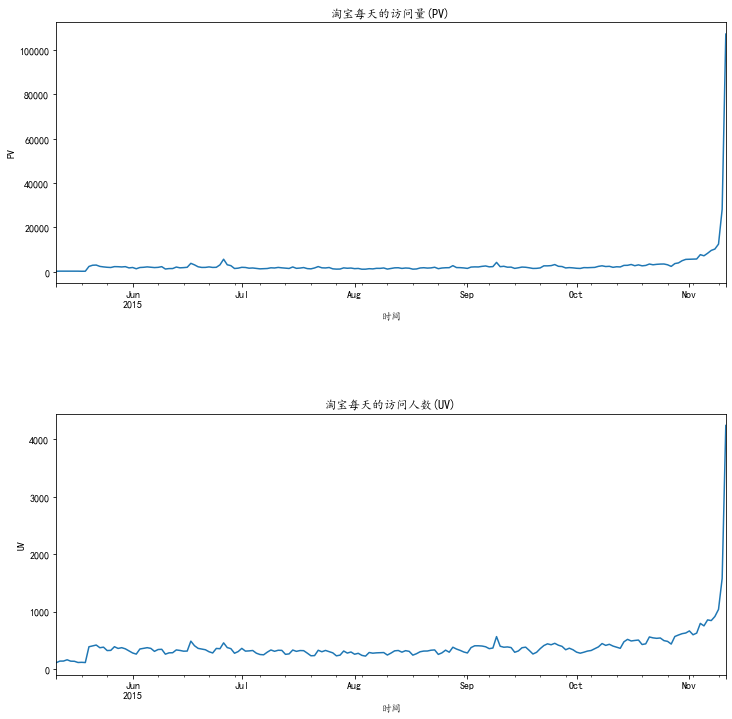

In [11]:
fig,axes = plt.subplots(nrows = 2,ncols = 1,figsize = (12,12))
plt.subplots_adjust(hspace = 0.5)# Ë∞ÉÊï¥‰∏ä‰∏ã‰∏§‰∏™Â≠êÂõæÁöÑÈó¥Ë∑ù

pv.plot(ax = axes[0])
uv.plot(ax = axes[1])

axes[0].set_title('Ê∑òÂÆùÊØèÂ§©ÁöÑËÆøÈóÆÈáè(PV)')
axes[0].set_xlabel('Êó∂Èó¥')
axes[0].set_ylabel('PV')

axes[1].set_title('Ê∑òÂÆùÊØèÂ§©ÁöÑËÆøÈóÆ‰∫∫Êï∞(UV)')
axes[1].set_xlabel('Êó∂Èó¥')
axes[1].set_ylabel('UV')

**ÁªìËÆ∫:**
- PV,UVÂú®Âπ≥Êó∂ÂëàÁé∞Âë®ÊúüÊÄßÁöÑÂèòÂåñ,Âú®Âèå11Êó∂ÂÄôÂëàÁé∞Êñ≠Â¥ñÂºèÂ¢ûÈïø.

## Áî®Êà∑Ë°å‰∏∫ÂàÜÊûê

### Êó∂Èó¥Áª¥Â∫¶

In [12]:
# È¶ñÂÖàÊãÜËß£Ë°®ÔºåÂ∞Üaction_typeÂàóËΩ¨Ë°å
log4 = pd.pivot_table(log3,
              index = 'time_stamp',# ‰ª•time_stamp‰∏∫Ë°åÁ¥¢ÂºïÂàÜÁªÑ
              columns = 'action_type',# Ê†πÊçÆaction_typeÁöÑ‰∏çÂêåÂàÜÂâ≤ÊØèË°åÁöÑÊï∞ÊçÆ
              values = 'user_id',# ÊØèË°åÊòæÁ§∫ÁöÑËØ•Êó•Êúü‰∏ãÁöÑuser_idÔºàÂΩìÊØè‰∏™Êó•ÊúüÊúâÂ§ö‰∏™user_idÊó∂ÔºåÈªòËÆ§ÊòæÁ§∫user_idÁöÑÂπ≥ÂùáÂÄºÔºâ
              aggfunc = np.size # Êõ¥ÊîπÈªòËÆ§Âπ≥Âùá‰∏∫Ê±Çuser_idÁöÑÊÄªÊï∞
              )
log4.columns = ["click","cart",'buy','fav']
log4

click   cart      buy     fav
time_stamp                                 
2015-05-11      NaN    NaN    100.0    78.0
2015-05-12      NaN    NaN    139.0    95.0
2015-05-13      NaN    3.0    134.0   101.0
2015-05-14      NaN    NaN    142.0   136.0
2015-05-15      NaN    2.0    109.0   129.0
...             ...    ...      ...     ...
2015-11-07   8775.0   31.0    129.0   653.0
2015-11-08   9261.0   46.0    113.0   791.0
2015-11-09  11392.0   49.0    130.0   867.0
2015-11-10  26346.0  104.0    136.0  1582.0
2015-11-11  93154.0  198.0  12253.0  1624.0

[185 rows x 4 columns]

Text(0.4, 0.9, 'Êó•Áª¥Â∫¶ÁöÑÁî®Êà∑Ë°å‰∏∫ÂèòÂåñ')

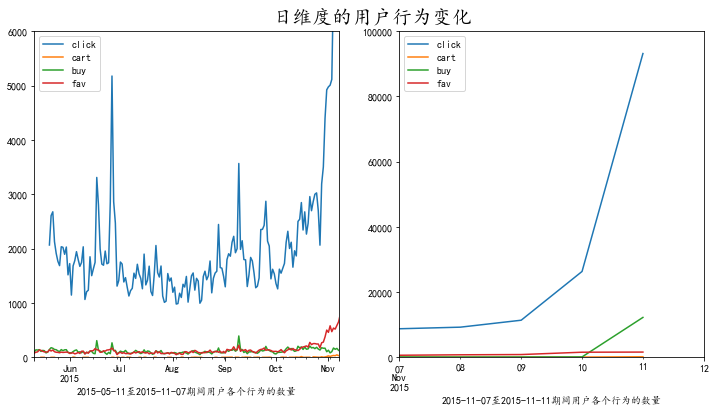

In [13]:
fig,axes = plt.subplots(nrows = 1,ncols = 2,figsize = (12,6))

log4.plot(ax = axes[0])
axes[0].set_ylim([0,6000])
axes[0].set_xlim(['2015-05-11','2015-11-07'])
axes[0].set_xlabel('2015-05-11Ëá≥2015-11-07ÊúüÈó¥Áî®Êà∑ÂêÑ‰∏™Ë°å‰∏∫ÁöÑÊï∞Èáè')

log4.plot(ax = axes[1])
axes[1].set_ylim([0,100000])
axes[1].set_xlim(['2015-11-07','2015-11-12'])
axes[1].set_xlabel('2015-11-07Ëá≥2015-11-11ÊúüÈó¥Áî®Êà∑ÂêÑ‰∏™Ë°å‰∏∫ÁöÑÊï∞Èáè')

fig.text(x=0.4, y=0.90,s='Êó•Áª¥Â∫¶ÁöÑÁî®Êà∑Ë°å‰∏∫ÂèòÂåñ', fontsize=20)

**ÁªìËÆ∫Ôºö**
- 11Êúà9Êó•‰πãÂâçÂõõÁßçË°å‰∏∫ÂëàÂë®ÊúüÊÄßÊ≥¢Âä®„ÄÇ‚ÄúÁÇπÂáª‚ÄùË°å‰∏∫ËøúÈ´ò‰∫éÂÖ∂‰ªñ‰∏âÁßçË°å‰∏∫ÁöÑÊï∞Èáè.
- 11Êúà9Êó•ÂºÄÂßãÁî®Êà∑ÁöÑ‚ÄúÁÇπÂáªË°å‰∏∫‚ÄùÊøÄÂ¢ûÔºåÊé®Êñ≠ËøôÊòØÂõ†‰∏∫Áî®Êà∑ÊèêÂâç‰∏ÄÂ§©ÂºÄÂßã‰∏∫ÂèåÂçÅ‰∏ÄÊåëÈÄâÂøÉ‰ª™ÁöÑ‰∫ßÂìÅ.
- 11Êúà11Êó•ÂΩìÂ§©‚ÄúÁÇπÂáªË°å‰∏∫‚ÄùËææÂà∞ÈºéÁõõÊó∂ÊúüÔºå‰ªÖ4242‰∏™Áî®Êà∑ÔºåÂ∞±‰∫ßÁîü‰∫ÜËøëÂçÅ‰∏áÊ¨°ÁöÑÁÇπÂáªË°å‰∏∫„ÄÇ‚ÄúË¥≠‰π∞‚ÄùË°å‰∏∫Êï∞ÈáèÂú®Âèå11ÂΩìÂ§©‰πüÊØîÂπ≥Êó∂Áøª‰∫Ü50ÂÄç‰πãÂ§ö.

### Ë°å‰∏∫ËΩ¨ÂåñÊºèÊñó

Áî±‰∫éÂèå11ÂΩìÂ§©ÁöÑË°å‰∏∫ËΩ¨ÂåñÊØîËæÉÁâπÊÆäÔºå‰ºöÂØπÊï¥‰ΩìÁöÑË°å‰∏∫ËΩ¨ÂåñÁéáÊúâÂæàÂ§ßÂΩ±Âìç.

ÊâÄ‰ª•Êàë‰ª¨Â∞ÜÊó•Â∏∏Êó∂Êúü‰∏éÂèå11Êó∂ÊúüÁöÑÁî®Êà∑Ë°å‰∏∫ËΩ¨ÂåñÂàÜÂºÄËÆ®ËÆ∫.

#### Êó•Â∏∏ÊúüÈó¥Ë°å‰∏∫ËΩ¨ÂåñÊºèÊñó

In [14]:
log5 = log3[log3['time_stamp'] <= '2015-11-05']
df = log5.groupby('action_type')['user_id'].count().reset_index().rename(columns={'user_id':'num'}).reindex([0,3,2]).reset_index(drop = True)
df# ËÆ°ÁÆóÂá∫2015-05-11Ëá≥2015-11-05ÊúüÈó¥‚ÄùÁÇπÂáª‚ÄúÔºå‚ÄùÊî∂Ëóè‚ÄúÔºå‚ÄùË¥≠‰π∞‚ÄúËøô‰∏âÁßçË°å‰∏∫ÁöÑÊÄªÈáè

action_type     num
0            0  332990
1            3   23379
2            2   20668

In [15]:
# Âçï‰∏ÄËΩ¨ÂåñÁéá(Èîô‰ΩçÁõ∏Èô§)
t = np.array(df['num'])[:-1]
t1 = np.array(df['num'])[1:]
conv1 = list(t1 / t)# ËΩ¨ÂåñÊàêlist
conv1.insert(0,1)# Á¨¨‰∏Ä‰ΩçÊèíÂÖ•1
conv1 = [round(x*100,2) for x in conv1]
df['single_convert'] = conv1

# ÊÄª‰ΩìËΩ¨ÂåñÁéáÔºàÈÉΩÈô§Á¨¨‰∏Ä‰∏™Ôºâ
conv2 = df['num'] / df['num'][0]
conv2 = [round(x*100,2) for x in conv2]
df['all_convert'] = conv2

df

action_type     num  single_convert  all_convert
0            0  332990          100.00       100.00
1            3   23379            7.02         7.02
2            2   20668           88.40         6.21

In [16]:
# ÁîªÂõæ
atrr = ['ÊµèËßà','Êî∂Ëóè','Ë¥≠‰π∞']
value = (np.array(df['all_convert'])).tolist()
funnel = Funnel()# ÂÆû‰æãÂåñ

#Ê∑ªÂä†Êï∞ÊçÆ
funnel.add("Ê∑òÂÆù",[list(z) for z in zip(atrr,value)])

#ËÆæÁΩÆÂèÇÊï∞
funnel.set_global_opts(title_opts = opts.TitleOpts(title = 'Ê∑òÂÆùÁî®Êà∑Ë°å‰∏∫ËΩ¨ÂåñÊºèÊñó'))
funnel.set_series_opts(label_opts = opts.LabelOpts(formatter = '{b}:{c}'))

#ÁîªÂõæ
funnel.render_notebook()

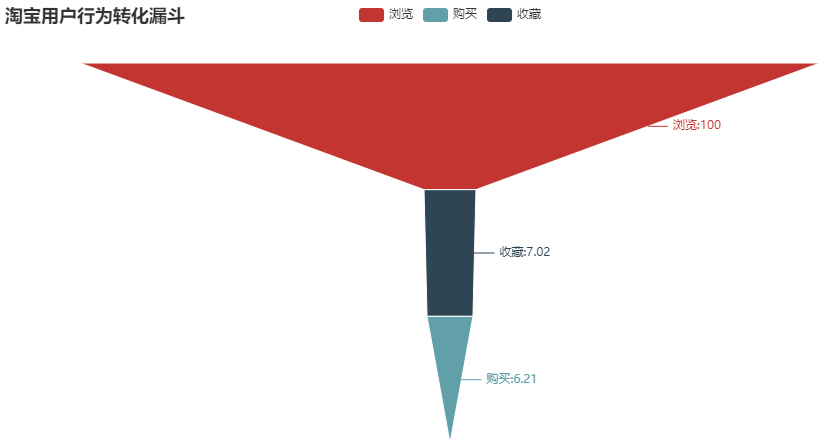

#### Âèå11ÊúüÈó¥Áî®Êà∑Ë°å‰∏∫ËΩ¨ÂåñÊºèÊñó

In [17]:
log6 = log3[log3['time_stamp'] > '2015-11-05']
df1 = log6.groupby('action_type')['user_id'].count().reset_index().rename(columns={'user_id':'num'})
df1# # ÂèØ‰ª•ÁúãÂà∞ÂèåÂçÅ‰∏ÄÊúüÈó¥Áî®Êà∑Â§ßÂ§öÁÇπÂáªÂêéÁõ¥Êé•Ë¥≠‰π∞ÔºåÂ∞ëÊúâÂä†Ë¥≠ÊàñÊî∂ËóèË°å‰∏∫ÔºåÊâÄ‰ª•Êàë‰ª¨‰ªÖËÄÉËôë‚ÄùÁÇπÂáª‚ÄúÂà∞‚ÄùË¥≠‰π∞‚ÄúÈó¥ÁöÑËΩ¨ÂåñÁéá

action_type     num
0            0  156436
1            1     475
2            2   12926
3            3    6102

In [18]:
df1 = df1.reindex([0,2])
df1

action_type     num
0            0  156436
2            2   12926

In [19]:
# Âçï‰∏ÄËΩ¨ÂåñÁéá(Èîô‰ΩçÁõ∏Èô§)
tt = np.array(df1['num'])[:-1]
tt1 = np.array(df1['num'])[1:]
cconv1 = list(tt1 / tt)# ËΩ¨ÂåñÊàêlist
cconv1.insert(0,1)# Á¨¨‰∏Ä‰ΩçÊèíÂÖ•1
cconv1 = [round(x*100,2) for x in cconv1]
df1['single_convert'] = cconv1

# ÊÄª‰ΩìËΩ¨ÂåñÁéáÔºàÈÉΩÈô§Á¨¨‰∏Ä‰∏™Ôºâ
cconv2 = df1['num'] / df1['num'][0]
cconv2 = [round(x*100,2) for x in cconv2]
df1['all_convert'] = cconv2

df1

action_type     num  single_convert  all_convert
0            0  156436          100.00       100.00
2            2   12926            8.26         8.26

In [20]:
# ÁîªÂõæ
atrr = ['ÊµèËßà','Ë¥≠‰π∞']
value = (np.array(df1['all_convert'])).tolist()
funnel1 = Funnel()# ÂÆû‰æãÂåñ

#Ê∑ªÂä†Êï∞ÊçÆ
funnel1.add("Ê∑òÂÆù",[list(z) for z in zip(atrr,value)])

#ËÆæÁΩÆÂèÇÊï∞
funnel1.set_global_opts(title_opts = opts.TitleOpts(title = 'Âèå11ÊúüÈó¥Ê∑òÂÆùÁî®Êà∑Ë°å‰∏∫ËΩ¨ÂåñÊºèÊñó'))
funnel1.set_series_opts(label_opts = opts.LabelOpts(formatter = '{b}:{c}'))

#ÁîªÂõæ
funnel1.render_notebook()

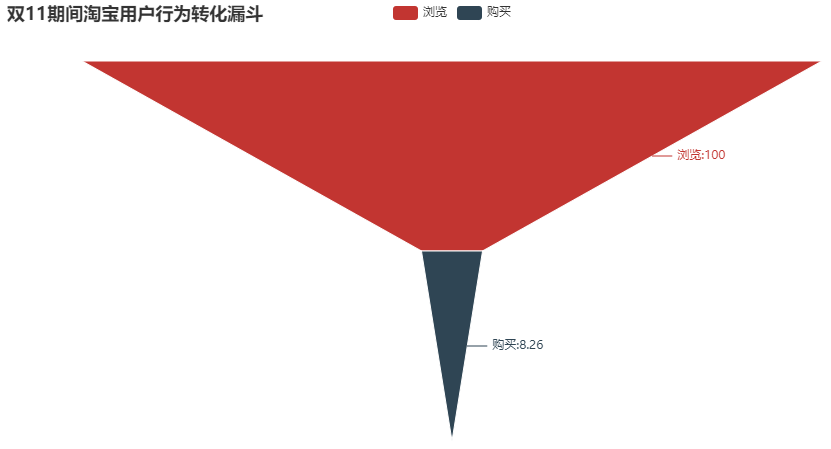

**ÁªìËÆ∫Ôºö**

- Êó•Â∏∏ÊúüÈó¥Áî±ÊµèËßàÂà∞Êî∂ËóèÁöÑËΩ¨ÂåñÁéá‰∏∫7.3%„ÄÅÊµèËßàÂà∞Ë¥≠‰π∞ÁöÑËΩ¨ÂåñÁéá‰∏∫6.0%.
- Âèå11ÊúüÈó¥ÊµèËßàÂà∞Ë¥≠‰π∞ÁöÑËΩ¨ÂåñÁéá‰∏∫8.4%.

ÂèØ‰ª•ÁúãÂà∞Âèå11ÊúüÈó¥ÁöÑËΩ¨ÂåñÁéáÊØîÂπ≥Êó∂È´òÔºå‰ΩÜÊòØÊ≤°ÊúâÈ´òÂæàÂ§öÔºå‰πüÂ∞±ÊòØËØ¥Âèå11ÊµèËßàÊ∑òÂÆùÁöÑÁî®Êà∑ËôΩÁÑ∂ÂæàÂ§öÔºå‰ΩÜÊòØÁúüÊ≠£ÊúâË¥≠‰π∞Ë°å‰∏∫ÁöÑÁî®Êà∑ÊØî‰æãÂç¥Ê≤°ÊúâÊØîÂπ≥Êó∂È´òÂá∫ÂæàÂ§ö„ÄÇËøôËØ¥ÊòéÔºöÂèåÂçÅ‰∏ÄÁöÑÈîÄÂîÆÈáèÊøÄÂ¢ûÁöÑÊ∑±Â±ÇÂéüÂõ†ÊòØÂèå11Ëøô‰∏™Âô±Â§¥Âê∏ÂºïÊù•‰∫ÜÂ∑®Â§ßÈáèÁöÑÁî®Êà∑ÔºåËÄå‰∏çÊòØÊØè‰∏™Áî®Êà∑Ë¥≠‰π∞ÁéáÂ±ÇÈù¢‰∏äÁöÑÂ¢ûÂä†„ÄÇ

### Áî®Êà∑Áª¥Â∫¶

Êé•‰∏ãÊù•Êàë‰ª¨ÂØπ05-11Ëá≥11-11Ëøô6‰∏™ÊúàÁöÑÊó∂Èó¥ÈáåÔºåÊØè‰∏™Áî®Êà∑ÁöÑÊÄªË¥≠‰π∞Ê¨°Êï∞ËøõË°åÂàÜÊûê.

In [21]:
# 05-11Ëá≥11-11
buy = log3[log3['action_type'] == 2].groupby('user_id').count()['action_type']
# (ÂâîÈô§Âèå11)05-11Ëá≥11-07
buy1 = log3[(log3['action_type'] == 2) & (log3['time_stamp'] <= '2015-11-07')].groupby('user_id').count()['action_type']

Text(0.5, 1.0, '6‰∏™ÊúàÂÜÖ(Èô§ÂéªÂèå11)Áî®Êà∑ÁöÑË¥≠‰π∞Ê¨°Êï∞')

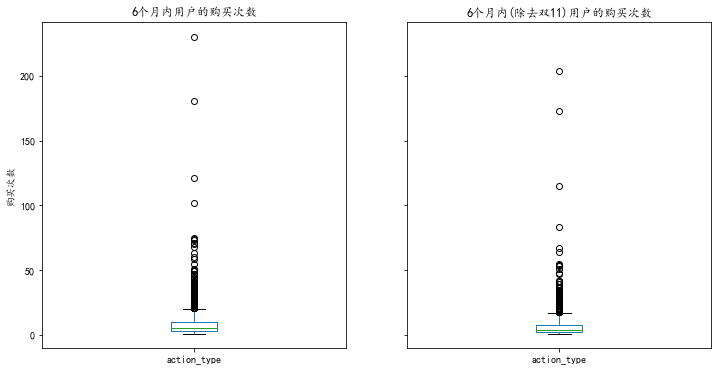

In [22]:
fig,axes = plt.subplots(nrows = 1,ncols = 2,sharey = True,figsize = (12,6))# ÂÖ±Áî®YËΩ¥

buy.plot.box(ax = axes[0])
axes[0].set_xlabel(' ')
axes[0].set_ylabel('Ë¥≠‰π∞Ê¨°Êï∞')
axes[0].set_title('6‰∏™ÊúàÂÜÖÁî®Êà∑ÁöÑË¥≠‰π∞Ê¨°Êï∞')

buy1.plot.box(ax = axes[1])
axes[1].set_xlabel(' ')
axes[1].set_ylabel('Ë¥≠‰π∞Ê¨°Êï∞')
axes[1].set_title('6‰∏™ÊúàÂÜÖ(Èô§ÂéªÂèå11)Áî®Êà∑ÁöÑË¥≠‰π∞Ê¨°Êï∞')

**ÁªìËÆ∫Ôºö**
- Â§ßÈÉ®ÂàÜÁöÑÁî®Êà∑6‰∏™Êúà‰ª•Êù•ÁöÑË¥≠Áâ©Ê¨°Êï∞Âú®7-8Ê¨°Â∑¶Âè≥Ôºå‰ΩÜ‰πüÊúâ‰∏çÂ∞ëÁöÑÁ¶ªÁæ§Áî®Êà∑„ÄÇÂºïÂèë‰∫Ü‰∏Ä‰∏™ÊÄùËÄÉÔºöËøô‰∫õÁ¶ªÁæ§Áî®Êà∑ÊòØ‰∏çÊòØÂõ†‰∏∫Âú®Âèå11‰π∞ÁöÑÁâπÂà´Â§öÂØºËá¥ÁöÑÂë¢ÔºüËøô‰∫õÁ¶ªÁæ§Áî®Êà∑ÊòØÂπ≥Á®≥ÊÄßÂú∞Êúâ‰ºòË¥®ÁöÑË¥≠Áâ©Ë°®Áé∞ÔºåËøòÊòØ‰ªÖÂú®Âèå11Ë°®Áé∞Â•ΩÂë¢Ôºü


- ‰∏∫‰∫ÜÂõûÁ≠î‰∏äÈù¢ÁöÑÈóÆÈ¢òÔºåÊàë‰ª¨ËßÇÂØüÂâîÈô§‰∫ÜÂèå11ÁöÑÁÆ±Á∫øÂõæ„ÄÇÂèëÁé∞Âõæ‰∫å‰∏≠ÁöÑÁ¶ªÁæ§Áî®Êà∑Ê≤°ÊúâÊòæËëóÂèòÂåñ„ÄÇÂõ†Ê≠§Êàë‰ª¨ÂèØ‰ª•ÊéíÈô§Âèå11ÁöÑÂõ†Á¥†ÔºåÂç≥Ëøô‰∫õÁ¶ªÁæ§Áî®Êà∑Âú®Âπ≥Êó∂Ë¥≠‰π∞ÁöÑÂ∞±ÊØîÊôÆÈÄöÁî®Êà∑Â§öÔºåËÄå‰∏çÊòØÂõ†‰∏∫‰ªñ‰ª¨Âú®Âèå11‰π∞ÁöÑÂ§öÊâçÈÄ†Êàê‰∫Ü‰ªñ‰ª¨ÁöÑË¥≠Áâ©ÊÄªÈáèÂ§ö„ÄÇÂõ†Ê≠§ÔºåÊàë‰ª¨Âú®Âà∂ÂÆöËê•ÈîÄÁ≠ñÁï•Êó∂ÂèØ‰ª•ÈáçÁÇπÂØπÂæÖÂØπËøô‰∫õË¥≠‰π∞Ê¨°Êï∞ÂæàÂ§ö‰∏îÁ®≥ÂÆöÁöÑÁ¶ªÁæ§Áî®Êà∑„ÄÇ

# Áî®Êà∑ËÅöÁ±ª

## Ëé∑ÂèñÁî®Êà∑ÁâπÂæÅ

‰∏∫‰∫ÜÂ∞ÜÁî®Êà∑ÂàÜ‰∏∫ÂÖ∑ÊúâÁõ∏‰ººÁâπÂæÅÁöÑÂá†Á±ªÔºåÊàë‰ª¨È¶ñÂÖàÈúÄË¶ÅÊúâ‰∏ÄÂàóÂàóÁöÑÁî®Êà∑ÁâπÂæÅÊï∞ÊçÆ„ÄÇ

Âú®infoË°®‰∏≠Êàë‰ª¨Â∑≤ÁªèÊúâ‰∫ÜÁî®Êà∑ÁöÑ‚ÄúÊÄßÂà´‚Äù,‚ÄúÂπ¥ÈæÑ‚ÄùÊï∞ÊçÆÔºå‰∏∫‰∫ÜËÆ©Áî®Êà∑ÁöÑÁâπÂæÅÁª¥Â∫¶Ë¶ÜÁõñÈù¢Êõ¥ÂπøÔºåÊàë‰ª¨ËÄÉËôëÁîüÊàê‰∏Ä‰∏™Áî®Êà∑ÁöÑ‚ÄúË¥≠Áâ©Ë°å‰∏∫‚ÄùÁâπÂæÅ„ÄÇËøôÂ∞±Áî®Âà∞‰∫ÜRFMÊ®°Âûã.

### ‰∏∫Áî®Êà∑Êñ∞Â¢ûRFMÁâπÂæÅ

ËøôÈáåË¶ÅÁâπÂà´ÊèêÈÜíÁöÑÊòØÔºöÁî±‰∫éÂèå11ÂΩìÂ§©ÊØè‰∏™Áî®Êà∑ÈÉΩÊúâË¥≠‰π∞Ë°å‰∏∫ÔºåÊâÄ‰ª•Êàë‰ª¨‰∏çËÄÉËôëÂèåÂçÅ‰∏ÄÂâçÂêéÁöÑË¥≠Áâ©ËÆ∞ÂΩï.

RFMÊ®°Âûã‰∏≠Áî±‰∫éÊàë‰ª¨Ê≤°ÊúâMÔºàÊ∂àË¥πÈáëÈ¢ùÔºâÊï∞ÊçÆÔºåÊâÄ‰ª•Êàë‰ª¨‰ªÖ‰ªÖËÄÉÈáèF‰∏éRÊï∞ÊçÆ.

In [23]:
now = datetime(2015,11,6)

# ËÆ°ÁÆóRÔºàÊØè‰∏™Áî®Êà∑Ë∑ùÁ¶ª2015-11-06ÊúâÂ§öÂ∞ëÂ§©Ê≤°Ë¥≠‰π∞Ëøá‰∏úË•ø‰∫ÜÔºâ
R = log3[(log3['action_type'] == 2) & (log3['time_stamp'] <= '2015-11-05')].groupby('user_id')['time_stamp'].max().map(lambda x: now - x)
R = R.reset_index().rename(columns = {'time_stamp': 'Recency'})
R

user_id  Recency
0          36  45 days
1         217  59 days
2         285  26 days
3         538 142 days
4         598   5 days
...       ...      ...
3375   423715   1 days
3376   423808  90 days
3377   423876   1 days
3378   423980  21 days
3379   424053   4 days

[3380 rows x 2 columns]

In [24]:
# # ËÆ°ÁÆóFÔºàÊØè‰∏™Áî®Êà∑ÁöÑÊÄªË¥≠‰π∞Ê¨°Êï∞Ôºâ
F = log3[(log3['action_type'] == 2) & (log3['time_stamp'] <= '2015-11-05')].groupby('user_id').count()['time_stamp']
F = F.reset_index().rename(columns = {'time_stamp': 'Frequency'})
F

user_id  Frequency
0          36          2
1         217          8
2         285         11
3         538          1
4         598          5
...       ...        ...
3375   423715          1
3376   423808          5
3377   423876         11
3378   423980          2
3379   424053          2

[3380 rows x 2 columns]

In [25]:
# Â∞ÜR‰∏éFÂêàÂπ∂
RFM = pd.merge(R,F,on = 'user_id')
RFM['Recency'] = RFM['Recency'].astype('timedelta64[D]').astype(int)
RFM

user_id  Recency  Frequency
0          36       45          2
1         217       59          8
2         285       26         11
3         538      142          1
4         598        5          5
...       ...      ...        ...
3375   423715        1          1
3376   423808       90          5
3377   423876        1         11
3378   423980       21          2
3379   424053        4          2

[3380 rows x 3 columns]

In [26]:
np.percentile(RFM['Recency'], [25, 50, 75])# ÂõõÂàÜ‰ΩçÊï∞Ê±ÇÂá∫ÂàíÂàÜÁÇπ

array([12., 29., 70.])

In [27]:
np.percentile(RFM['Frequency'], [25, 50, 75])# ÂõõÂàÜ‰ΩçÊï∞Ê±ÇÂá∫ÂàíÂàÜÁÇπ

array([2., 4., 8.])

In [28]:
# Ê†πÊçÆÂàíÂàÜÁÇπ‰∏∫Áî®Êà∑ÊâìÂàÜ
def R(x):
    if x < 12:
        return 4
    elif (x >= 12) & (x < 28):
        return 3
    elif (x >= 28) & (x < 68):
        return 2
    elif (x >= 68):
        return 1

def F(x):
    if x < 2:
        return 1
    elif (x >= 2) & (x < 4):
        return 2
    elif (x >= 4) & (x < 8):
        return 3
    elif (x >= 8):
        return 4

In [29]:
RFM['R_score'] = RFM["Recency"].map(R)
RFM['F_score'] = RFM["Frequency"].map(F)

RFMÊÄªÂàÜÂÄºÔºöRFM = R_score‚àó100 + F_score‚àó10 + M_score‚àó1 ËøôÊòØ‰∏öÂÜÖÂ∏∏Áî®ÁöÑÊâìÂàÜÊñπÂºè.

ËøôÊ†∑‰∏ÄÊù•ÔºåËØÅÊòéË¥≠‰π∞È¢ëÁéá‰∏ÄÁõ¥ÊòØÂïÜÂÆ∂ÊØîËæÉÁúãÈáçÁöÑÔºå ÊØïÁ´üÂ∞ΩÁÆ°‰Ω†ÊØèÊ¨°Ê∂àË¥πÂæàÂ∞ë(MÂÄºÂ∞è)Ôºå‰ΩÜ‰Ω†ÊåÅÁª≠ÂÖ≥Ê≥®Êàë‰ª¨Â∫óÈì∫‰∏îÊ∂àË¥πÈ¢ëÁéáÂæàÈ´òÔºå ËøôÊ†∑‰Ω†ËøüÊó©‰ºö‰∏≠ÂπøÂëäÁöÑÊãõÔºåÁ¥ØËÆ°Ê∂àË¥πËøüÊó©‰πüÂæàÈ´ò.

Áî±‰∫éÊàë‰ª¨Ê≤°ÊúâMÂÄºÔºåÊâÄ‰ª•ÈááÂèñRFM = R_score‚àó10 + F_scoreÁöÑÊâìÂàÜÊñπÂºè.

In [30]:
RFM['Total_score'] = RFM['R_score'] * 10 + RFM['F_score']
RFM

user_id  Recency  Frequency  R_score  F_score  Total_score
0          36       45          2        2        2           22
1         217       59          8        2        4           24
2         285       26         11        3        4           34
3         538      142          1        1        1           11
4         598        5          5        4        3           43
...       ...      ...        ...      ...      ...          ...
3375   423715        1          1        4        1           41
3376   423808       90          5        1        3           13
3377   423876        1         11        4        4           44
3378   423980       21          2        3        2           32
3379   424053        4          2        4        2           42

[3380 rows x 6 columns]

### ÁâπÂæÅË°®ÂêàÂπ∂

In [31]:
data = pd.merge(info,RFM,on = 'user_id')[['user_id','gender','age_range','Total_score']]
data

user_id  gender  age_range  Total_score
0      404724     2.0        3.0           44
1      247951     0.0        3.0           41
2      321246     0.0        3.0           14
3      364008     0.0        3.0           44
4      370359     1.0        0.0           42
...       ...     ...        ...          ...
3375   176676     0.0        0.0           44
3376   180510     0.0        4.0           23
3377    96992     2.0        2.0           21
3378    31574     0.0        0.0           11
3379   210986     0.0        3.0           11

[3380 rows x 4 columns]

In [32]:
# Êü•ÁúãÊØèÂàóÁº∫Â§±ÂÄº
print(data.isnull().any())
# ÂéªÈô§Áº∫Â§±ÂÄº
data = data[(data['gender'].notnull()) & (data['age_range'].notnull()) & (data['age_range'] != 0)]# ÂÆòÊñπÊï∞ÊçÆÈõÜ‰∏äË°®Á§∫age=0‰πüÊòØÁº∫Â§±Êï∞ÊçÆ
# gender‰∏éage_rangeÂàóÁ±ªÂûãËΩ¨Êç¢
g = data['gender'].map(lambda x:int(x))
g = g.map(lambda x: 1 if x == 0 else 2)
a = data['age_range'].map(lambda x:int(x))
data['gender'] = g
data['age_range'] = a

data

user_id        False
gender          True
age_range       True
Total_score    False
dtype: bool


<ipython-input-32-505aebc0845d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['gender'] = g
<ipython-input-32-505aebc0845d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age_range'] = a


user_id  gender  age_range  Total_score
0      404724       2          3           44
1      247951       1          3           41
2      321246       1          3           14
3      364008       1          3           44
5       38706       1          2           22
...       ...     ...        ...          ...
3371   122718       1          3           22
3374   208823       1          2           33
3376   180510       1          4           23
3377    96992       2          2           21
3379   210986       1          3           11

[2677 rows x 4 columns]

## K-MeansËÅöÁ±ª

In [33]:
# Â∞ÜÁâπÂæÅÊï∞ÊçÆËΩ¨Êç¢‰∏∫ndarryÁ±ªÂûã
data1 = data.iloc[:,1:].values
data1

array([[ 2,  3, 44],
       [ 1,  3, 41],
       [ 1,  3, 14],
       ...,
       [ 1,  4, 23],
       [ 2,  2, 21],
       [ 1,  3, 11]], dtype=int64)

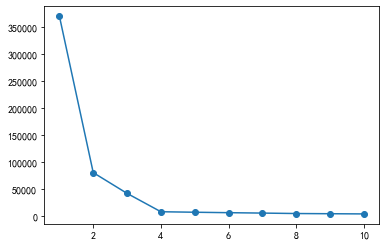

In [34]:
# Âà©Áî®ËÇòÈÉ®Ê≥ïÈÄâÊã©ÂêàÈÄÇKÂÄº
inertia = []
for i in range(1,11):
    model = cluster.KMeans(n_clusters = i)
    model.fit(data1)
    inertia.append(model.inertia_)
plt.plot(range(1,11),inertia,'o-')   

In [35]:
# ÂèØ‰ª•ÁúãÂà∞k = 4ÊúÄ‰ºòÔºåÂèñk = 4ËÅöÁ±ª
model1 = cluster.KMeans(n_clusters = 4)
model1.fit(data1)
label = model1.labels_

In [36]:
# Â∞ÜËÅöÁ±ªÁªìÊûúÂÜôÂÖ•Êï∞ÊçÆÈõÜ
data['label'] = label
data

<ipython-input-36-7282e039d920>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = label


user_id  gender  age_range  Total_score  label
0      404724       2          3           44      2
1      247951       1          3           41      2
2      321246       1          3           14      1
3      364008       1          3           44      2
5       38706       1          2           22      3
...       ...     ...        ...          ...    ...
3371   122718       1          3           22      3
3374   208823       1          2           33      0
3376   180510       1          4           23      3
3377    96992       2          2           21      3
3379   210986       1          3           11      1

[2677 rows x 5 columns]

<AxesSubplot:xlabel='col1', ylabel='col2'>

D:\Softwords\Python\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Softwords\Python\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


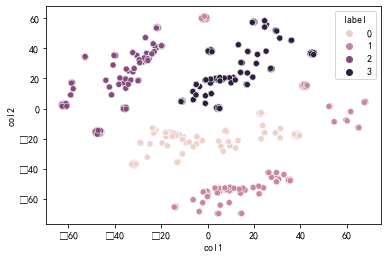

In [37]:
# ÈôçÁª¥ÁîªÂõæÊòæÁ§∫
tsne = manifold.TSNE() 
tsne_data = tsne.fit_transform(data1)
tsne_df = pd.DataFrame(tsne_data,columns=['col1','col2'])
tsne_df.loc[:,'label']=label
sns.scatterplot(x = 'col1',y='col2',hue='label',data=tsne_df)

## ËΩÆÂªìÁ≥ªÊï∞ËØÑ‰º∞ËÅöÁ±ªÁªìÊûú

In [38]:
score = metrics.silhouette_score(data1,label)
score # ËΩÆÂªìÁ≥ªÊï∞ÂèñÂÄº‰∏∫[-1, 1]ÔºåÂÖ∂ÂÄºË∂äÂ§ßË∂äÂ•Ω.0.78ËØ¥ÊòéËÅöÁ±ªÊïàÊûúÂæà‰∏çÈîô‰∫Ü„ÄÇ

0.784238783637643

# A/B Testing

ÊúâÊù•‰∫Ü‰∏Ä‰∏™Êñ∞ÈóÆÈ¢òÔºöÂÅáÂ¶ÇËØ¥Áé∞Âú®Ê∑òÂÆùË¶ÅÂØπlanding pageËøõË°åÊõ¥Êñ∞Ëø≠‰ª£ÔºåËÆæËÆ°Âá∫‰∫Ü‰∏Ä‰∏™Êñ∞ÁöÑÈ°µÈù¢BÔºåÂú®Êé®ÂπøÂâçÈúÄË¶ÅÂ∞Ü**Êñ∞ÁöÑBÈ°µÈù¢**‰∏é**ÊóßÁöÑAÈ°µÈù¢**‰πãÈó¥ËøõË°åA/B TestingÔºåËøáÁ®ãÂ¶Ç‰∏ãÔºö
- **Á°ÆÂÆöÁõÆÊ†á**ÔºöËÆæÁΩÆ‰∏ªË¶ÅÊåáÊ†áÊù•Ë°°ÈáèÁâàÊú¨‰ºòÂä£ÔºåËøôÈáåÊàë‰ª¨‰∏ªË¶ÅtrackÊåáÊ†á"ËΩ¨ÂåñÁéáÔºàÁî®Êà∑ÊòØÂê¶ÊúâËøábuyË°å‰∏∫Ôºâ"Ôºå"cilckÊ¨°Êï∞"„ÄÇ
- **ËøêË°åÂÆûÈ™å**Ôºö
    1. Áî®Êà∑ÂàÜÊµÅÔºöËÆ©‰∏§ÁªÑ**ÂêåË¥®**Ôºå**ÂùáÂåÄ**ÁöÑÁî®Êà∑Âú®**Âêå‰∏ÄÊó∂Èó¥**(2015-12-13Ëá≥2016-01-13ÊúüÈó¥)ÂÜÖÂàÜÂà´‰ΩìÈ™å‰∏§‰∏™‰∏çÂêåÁöÑÈ°µÈù¢A‰∏éB„ÄÇ
    2. Êî∂ÈõÜÂÆûÈ™åÊï∞ÊçÆÔºö‰ΩìÈ™å15Â§©ÂêéÊî∂ÈõÜ‰∏§ÁªÑÁî®Êà∑ÁöÑ‚ÄúËΩ¨ÂåñÁéá‚Äù‰ª•Âèä‚ÄúcilckÊ¨°Êï∞‚ÄùÊåáÊ†á„ÄÇÔºàÁî±‰∫éÊ≤°ÊúâÁúüÂÆûÁöÑÊï∞ÊçÆÔºåÊâÄ‰ª•Âú®ËøôÈáåÊàë‰ª¨Âú®ÂéüÊï∞ÊçÆÁöÑÂü∫Á°Ä‰∏äÂ¢ûÂä†‰∏Ä‰∫õÊâ∞Âä®ÔºåÈöèÊú∫ÁîüÊàêÂÆûÈ™åÁªìÊûúÊï∞ÊçÆÔºâ
    
- **ÂÅáËÆæÊ£ÄÈ™å**ÔºöÂØπ‰∫é‚ÄúËΩ¨ÂåñÁéá‚ÄùÊàë‰ª¨ËÄÉËôë‰ΩøÁî®zÊ£ÄÈ™åÔºåÂØπ‰∫é‚ÄúcilckÊ¨°Êï∞‚ÄùÊàë‰ª¨ËÄÉËôë‰ΩøÁî®tÊ£ÄÈ™å„ÄÇ

## Áî®Êà∑ÂàÜÊµÅ

Êà™Ëá≥ÁõÆÂâçÔºåÊàë‰ª¨Â∑≤ÁªèÊ†πÊçÆÁî®Êà∑ÁöÑ"ÊÄßÂà´","Âπ¥ÈæÑ"Ôºå"RFM"Ëøô‰∏â‰∏™ÁâπÂæÅ‰∏∫Áî®Êà∑Â¢ûÊ∑ª‰∫ÜÁâπÂæÅÊ†áÁ≠æÔºåÂ∞ÜÁî®Êà∑ÂàÜÊàê‰∫ÜÈ£éÊ†ºËø•ÂºÇÁöÑÂõõÁ±ª„ÄÇ


Áî±‰∫élanding pageÁöÑÂèòÂä®ÊòØ‰∏çÁ°ÆÂÆöÊÄßËæÉÂº∫ÁöÑÂÆûÈ™åÔºå‰∏∫‰∫ÜÂ∞ΩÈáèÂáèÂ∞èÁî®Êà∑‰ΩìÈ™åÂΩ±ÂìçÔºåÊàë‰ª¨ÂÖà‰ΩøÁî®Â∞èÊµÅÈáèÂÆûÈ™åÔºåÂ¶ÇÊûúÂÆûÈ™å‰∏≠BÈ°µÈù¢Ë°®Áé∞ÁöÑÂ•ΩÔºåÂÜçËÄÉËôëÊÖ¢ÊÖ¢Êâ©Â§ßÂÆûÈ™åËåÉÂõ¥„ÄÇÁõÆÂâçÁöÑÂàÜÊµÅÊØîÊòØËÆ©Â∑≤ÊúâÂàÜÁ±ªÊ†áÁ≠æÁöÑ2643‰∏™Áî®Êà∑‰∏≠ÁöÑ80%‰ªçÁÑ∂‰ΩøÁî®ÊóßÁöÑAÈ°µÈù¢ÔºàÂØπÁÖßÁªÑÔºâÔºå20%‰ΩøÁî®Êñ∞ÁöÑBÈ°µÈù¢ÔºàÂÆûÈ™åÁªÑÔºâ„ÄÇ

‰∏∫‰∫Ü‰øùËØÅÂÆûÈ™åÁªÑ‰∏éÂØπÁÖßÁªÑÁî®Êà∑ÁöÑÂêåË¥®ÊÄßÔºåÊàë‰ª¨ÈúÄË¶ÅÁ°Æ‰øùËøô‰∏§ÁªÑÁî®Êà∑ÁöÑÁâπÂæÅÂú®ÂêÑ‰∏™Áª¥Â∫¶ÈÉΩÁõ∏‰ººÊâçÂèØ‰ª•„ÄÇËøôÊó∂ÂÄôÊàë‰ª¨‰πãÂâçËÅöÁ±ªÂá∫Êù•ÁöÑÁî®Êà∑Ê†áÁ≠æÂ∞±Ê¥æ‰∏äÁî®Âú∫‰∫ÜÔºÅÂ∞±ÂÉè‰∏ãÊñπËøô‰∏™ÂõæÊâÄÊºîÁ§∫ÁöÑÔºåÊàë‰ª¨‰ªéÁ±ª1„ÄÅ2„ÄÅ3„ÄÅ4‰∏≠ÂêÑÂèñ80%‰Ωú‰∏∫ÂØπÁÖßÁªÑÁî®Êà∑ÔºåÂÜç‰ªéÁ±ª1„ÄÅ2„ÄÅ3„ÄÅ4‰∏≠ÂêÑÂèñ20%‰Ωú‰∏∫ÂÆûÈ™åÁªÑÁî®Êà∑„ÄÇ

**Áî±‰∫éÊØè‰∏™Á±ª‰∏≠ÁöÑÁî®Êà∑ÈÉΩÊòØÁõ∏‰ººÁöÑÔºåÂàôÊäΩÂá∫Êù•ÁöÑÂÆûÈ™åÁªÑ‰∏éÂØπÁÖßÁªÑ‰πü‰∏ÄÂÆöÊòØÁõ∏‰ººÁöÑÔºÅ**
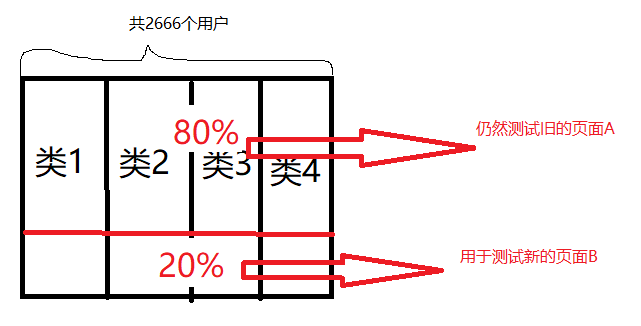

In [39]:
# Êà™Ëá≥ÁõÆÂâçÔºåÊàë‰ª¨Â∑≤ÁªèÂØπÁî®Êà∑ËøõË°å‰∫ÜÂàÜÁ±ª
data_ab = data[['user_id','label']]
data_ab

user_id  label
0      404724      2
1      247951      2
2      321246      1
3      364008      2
5       38706      3
...       ...    ...
3371   122718      3
3374   208823      0
3376   180510      3
3377    96992      3
3379   210986      1

[2677 rows x 2 columns]

In [40]:
# Âú®0ÁªÑÈöèÊú∫Âèñ20%ÁöÑÁî®Êà∑Áî®‰∫éÊµãËØïBÈ°µÈù¢ÔºåÂâ©‰∏ãÁöÑÁî®Êà∑ËøòÊòØAÈ°µÈù¢
data_ab0 = data_ab[data_ab['label'] == 0]
# Â∞Üdata_ab0Êâì‰π±È°∫Â∫è
data_ab0 = data_ab0.reindex(np.random.permutation(data_ab0.index)).reset_index(drop = True) 
# Á°ÆÂÆöÊµãËØïBÈ°µÈù¢ÁöÑÁî®Êà∑Êï∞Èáè
n0 = int(data_ab0.shape[0] * 0.2)
# Êõ¥ÊîπlabelÂàó‰∏∫landing_page
data_ab0.iloc[0:n0,1] = 'B'
data_ab0.iloc[n0:,1] = 'A'
data_ab0.rename(columns = {'label':'landing_page'},inplace = True)
data_ab0

user_id landing_page
0     299921            B
1      78160            B
2      40042            B
3     398492            B
4      42328            B
..       ...          ...
640   366074            A
641    62120            A
642   189531            A
643   148654            A
644   168024            A

[645 rows x 2 columns]

In [41]:
# Âú®1ÁªÑÈöèÊú∫Âèñ20%ÁöÑÁî®Êà∑Áî®‰∫éÊµãËØïBÈ°µÈù¢ÔºåÂâ©‰∏ãÁöÑÁî®Êà∑ËøòÊòØAÈ°µÈù¢
data_ab1 = data_ab[data_ab['label'] == 1]
# Â∞Üdata_ab0Êâì‰π±È°∫Â∫è
data_ab1 = data_ab1.reindex(np.random.permutation(data_ab1.index)).reset_index(drop = True) 
# Á°ÆÂÆöÊµãËØïBÈ°µÈù¢ÁöÑÁî®Êà∑Êï∞Èáè
n1 = int(data_ab1.shape[0] * 0.2)
# Êõ¥ÊîπlabelÂàó‰∏∫landing_page
data_ab1.iloc[0:n1,1] = 'B'
data_ab1.iloc[n1:,1] = 'A'
data_ab1.rename(columns = {'label':'landing_page'},inplace = True)
data_ab1

user_id landing_page
0     354676            B
1     204264            B
2     348996            B
3     338158            B
4     110297            B
..       ...          ...
692   279280            A
693   259463            A
694    97474            A
695   334227            A
696   271929            A

[697 rows x 2 columns]

In [42]:
# Âú®2ÁªÑÈöèÊú∫Âèñ20%ÁöÑÁî®Êà∑Áî®‰∫éÊµãËØïBÈ°µÈù¢ÔºåÂâ©‰∏ãÁöÑÁî®Êà∑ËøòÊòØAÈ°µÈù¢
data_ab2 = data_ab[data_ab['label'] == 2]
# Â∞Üdata_ab0Êâì‰π±È°∫Â∫è
data_ab2 = data_ab2.reindex(np.random.permutation(data_ab2.index)).reset_index(drop = True) 
# Á°ÆÂÆöÊµãËØïBÈ°µÈù¢ÁöÑÁî®Êà∑Êï∞Èáè
n2 = int(data_ab2.shape[0] * 0.2)
# Êõ¥ÊîπlabelÂàó‰∏∫landing_page
data_ab2.iloc[0:n2,1] = 'B'
data_ab2.iloc[n2:,1] = 'A'
data_ab2.rename(columns = {'label':'landing_page'},inplace = True)
data_ab2

user_id landing_page
0     286647            B
1     183401            B
2     356914            B
3     228882            B
4     378202            B
..       ...          ...
648   423715            A
649    53384            A
650   315439            A
651   228520            A
652   309005            A

[653 rows x 2 columns]

In [43]:
# Âú®3ÁªÑÈöèÊú∫Âèñ20%ÁöÑÁî®Êà∑Áî®‰∫éÊµãËØïBÈ°µÈù¢ÔºåÂâ©‰∏ãÁöÑÁî®Êà∑ËøòÊòØAÈ°µÈù¢
data_ab3 = data_ab[data_ab['label'] == 3]
# Â∞Üdata_ab0Êâì‰π±È°∫Â∫è
data_ab3 = data_ab3.reindex(np.random.permutation(data_ab3.index)).reset_index(drop = True) 
# Á°ÆÂÆöÊµãËØïBÈ°µÈù¢ÁöÑÁî®Êà∑Êï∞Èáè
n3 = int(data_ab3.shape[0] * 0.2)
# Êõ¥ÊîπlabelÂàó‰∏∫landing_page
data_ab3.iloc[0:n3,1] = 'B'
data_ab3.iloc[n3:,1] = 'A'
data_ab3.rename(columns = {'label':'landing_page'},inplace = True)
data_ab3

user_id landing_page
0     410671            B
1     108507            B
2      28545            B
3     223744            B
4     237806            B
..       ...          ...
677   321611            A
678   344609            A
679   217313            A
680   215882            A
681   223251            A

[682 rows x 2 columns]

In [44]:
# Â∞Ü‰∏äÈù¢Âõõ‰∏™Ë°®ÔºåÂπ∂ÊåâuseridÊéíÂàóÔºåÂπ∂‰∏îÈáçÂª∫Á¥¢Âºï
info_ab = pd.concat([data_ab0,data_ab1,data_ab2,data_ab3]).sort_values(by = 'user_id')
info_ab

user_id landing_page
105       36            B
297      217            A
472      285            A
327      598            A
260      799            A
..       ...          ...
22    423523            B
648   423715            A
537   423808            A
7     423876            B
195   424053            A

[2677 rows x 2 columns]

## ÁîüÊàêÂÆûÈ™åÊï∞ÊçÆ

In [45]:
# Êàë‰ª¨‰ªÖÂèñ2015-10-01Ëá≥2015-11-01‰πãÂâçÁöÑÊï∞ÊçÆÔºàÊúâÊÑèËßÑÈÅøÂèå11Ôºâ
log7 = log3[(log3['time_stamp'] <= '2015-11-01') & (log3['time_stamp'] >= '2015-10-01')]
log7

user_id time_stamp  action_type
29658222   263940 2015-10-01            0
29658218   263940 2015-10-01            0
29658216   263940 2015-10-01            0
21412373   230809 2015-10-01            0
21412383   230809 2015-10-01            0
...           ...        ...          ...
39178682   134610 2015-11-01            0
18987055   408380 2015-11-01            3
31352342   231753 2015-11-01            0
20214708    78306 2015-11-01            0
30455618   266990 2015-11-01            0

[92541 rows x 3 columns]

In [46]:
# ÊãÜËß£Ë°®log7ÔºåÂ∞Üaction_typeÂàóËΩ¨Ë°å
log8 = pd.pivot_table(log7,
              index = 'user_id',# ‰ª•time_stamp‰∏∫Ë°åÁ¥¢ÂºïÂàÜÁªÑ
              columns = 'action_type',# Ê†πÊçÆaction_typeÁöÑ‰∏çÂêåÂàÜÂâ≤ÊØèË°åÁöÑÊï∞ÊçÆ
              
              aggfunc = np.size 
              )
log8.columns = ["click","cart",'buy','fav']
log8

click  cart   buy  fav
user_id                        
36         9.0   NaN   NaN  NaN
217       16.0   NaN   NaN  1.0
285        3.0   NaN   1.0  NaN
467        2.0   NaN   NaN  NaN
538        NaN   1.0   NaN  NaN
...        ...   ...   ...  ...
423523   124.0   NaN  10.0  2.0
423715     3.0   NaN   NaN  NaN
423876    55.0   NaN   3.0  NaN
423980     2.0   NaN   1.0  NaN
424053     2.0   NaN   NaN  NaN

[3506 rows x 4 columns]

In [47]:
# È¶ñÂÖàÂà†Èô§ÊéâÈÉΩÊòØNANÁöÑË°å
log8.dropna(how = 'all')
# ÂèØ‰ª•ÁúãÂà∞Ê≤°ÊúâÈÉΩÊòØNaNÁöÑË°å

click  cart   buy  fav
user_id                        
36         9.0   NaN   NaN  NaN
217       16.0   NaN   NaN  1.0
285        3.0   NaN   1.0  NaN
467        2.0   NaN   NaN  NaN
538        NaN   1.0   NaN  NaN
...        ...   ...   ...  ...
423523   124.0   NaN  10.0  2.0
423715     3.0   NaN   NaN  NaN
423876    55.0   NaN   3.0  NaN
423980     2.0   NaN   1.0  NaN
424053     2.0   NaN   NaN  NaN

[3506 rows x 4 columns]

In [48]:
print(log8['click'].isnull().sum())
print(log8['cart'].isnull().sum())
print(log8['buy'].isnull().sum())
print(log8['fav'].isnull().sum())
# 'cart'Âíå'fav'ÂàóÁöÑÁº∫Â§±ÂÄºÊØîËæÉÂ§öÔºåÊâÄ‰ª•Êàë‰ª¨Âè™ËÄÉËôëbuy‰∏écilck
# buyÊúâ1713Ë°åÁº∫Â§±ÔºöËØ¥ÊòéËøô1713‰∏™Áî®Êà∑Âú®2015-10-01Ëá≥2015-11-01ÊúüÈó¥Ê≤°ÊúâË¥≠‰π∞Ë°å‰∏∫„ÄÇ
# cilckÊúâ142Ë°åÁº∫Â§±ÔºåÂâçÈù¢Áü•ÈÅì‰∫ÜÊ≤°ÊúâÈÉΩÊòØNaNÁöÑË°åÔºåËØ¥ÊòéËøô142Ë°åÊòØËÑèÊï∞ÊçÆÔºàÊúâcartÔºåbuyÔºåfavË°å‰∏∫Â∞±‰∏çÂèØËÉΩÊ≤°ÊúâcilckË°å‰∏∫ÔºâÔºåÈúÄË¶ÅÂéªÊéâ„ÄÇ

138
3425
1744
2321


In [49]:
log9 = log8[log8['click'].notnull()][['click','buy']] #ÂéªÊéâcilckÁöÑ42Ë°åÁº∫Â§±ÁöÑËÑèÊï∞ÊçÆ
# Êàë‰ª¨‰∏çËÄÉËôëË¥≠‰π∞Ê¨°Êï∞ÔºåÂè™ËÄÉËôëÊòØÂê¶ÊúâË¥≠‰π∞Ë°å‰∏∫(Â∞ÜbuyËΩ¨Êç¢‰∏∫0,1)
log9['buy'] = log9['buy'].map(lambda x: 0 if np.isnan(x) else 1)
# ËΩ¨Êç¢clickÊï∞ÊçÆÁ±ªÂûã‰∏∫intÂûã
log9['click'] = log9['click'].map(lambda x: int(x))
log9

click  buy
user_id            
36           9    0
217         16    0
285          3    1
467          2    0
598          6    1
...        ...  ...
423523     124    1
423715       3    0
423876      55    1
423980       2    1
424053       2    0

[3368 rows x 2 columns]

In [50]:
#Â∞Ülog9‰∏éinfo_abËøûÊé•
ab = pd.merge(info_ab,log9,right_index = True,left_on = 'user_id')[['user_id','click','buy','landing_page']].reset_index(drop = True)
ab

user_id  click  buy landing_page
0          36      9    0            B
1         217     16    0            A
2         285      3    1            A
3         598      6    1            A
4         799     25    1            A
...       ...    ...  ...          ...
2224   423225     37    1            A
2225   423523    124    1            B
2226   423715      3    0            A
2227   423876     55    1            B
2228   424053      2    0            A

[2229 rows x 4 columns]

Ëá≥Ê≠§ÔºåÊàë‰ª¨ÂæóÂà∞‰∫ÜÊµãËØïAÈ°µÈù¢‰∏éÊµãËØïBÈ°µÈù¢ÁöÑÁî®Êà∑Êï∞ÊçÆ„ÄÇ‰ΩÜÊòØËøô‰∏™Êï∞ÊçÆÂÖ∂ÂÆû‰∏çÊòØÊàë‰ª¨ÂÆûÈ™åÊúüÈó¥Ôºà2015-12-13Ëá≥2016-01-13ÊúüÈó¥ÔºâÂæóÂà∞ÁöÑÊï∞ÊçÆÔºåËÄåÊòØÊ†πÊçÆÂéüÂßãÊï∞ÊçÆÔºà2015-10-01Ëá≥2015-11-01ÊúüÈó¥ÔºâÁî®Êà∑‰ΩøÁî®ÊóßÁöÑÈ°µÈù¢AÂæóÂà∞ÁöÑÊï∞ÊçÆ„ÄÇÁúüÊ≠£ÁöÑÂÆûÈ™åÊï∞ÊçÆÊàëÊó†Ê≥ïËé∑ÂæóÔºåÊâÄ‰ª•Êàë‰æùÊçÆÂéüÂßãÊï∞ÊçÆÈöèÊú∫ÁîüÊàê

- Ê†πÊçÆlanding_page = 'A'ÁöÑÁî®Êà∑ÁöÑ'click'ÁöÑÂùáÂÄºÁîüÊàê‰∏ÄÂàóÊ≠£ÊÄÅÂàÜÂ∏ÉÁöÑÊï∞ÊçÆ„ÄÇÊàë‰ª¨Êää‰ªñÂΩì‰ΩúÊµãËØïAÈ°µÈù¢ÁöÑÁî®Êà∑Âú®ÂÆûÈ™åÊúüÈó¥ÁöÑ'click'Êï∞ÊçÆÔºõÊ†πÊçÆlanding_page = 'A'ÁöÑÁî®Êà∑ÁöÑË¥≠‰π∞ÁéáÁîüÊàê‰∏ÄÂàóÊòØÂê¶Ë¥≠‰π∞ÁöÑÊï∞ÊçÆÔºåËÆ∞ÂÖ•**Ë°®A**„ÄÇ

- ËÄåË°®BÁöÑÊï∞ÊçÆÂç¥‰∏çËÉΩÂÜçÁî®abË°®‰∏≠Âè™Êúâlanding_page = 'B'ÁöÑÊï∞ÊçÆ‰∫ÜÔºàÂõ†‰∏∫landing_page = 'B'ÁöÑÁî®Êà∑Ë°å‰∏∫Êï∞ÊçÆ‰πüÊòØ‰ªñ‰ª¨ÊµèËßàÈ°µÈù¢AÊâÄÂæóÂà∞ÊòØÊï∞ÊçÆÔºâ„ÄÇÊâÄ‰ª•Êàë‰ª¨Âú®ÂéüÂßãÊï∞ÊçÆÁöÑÂü∫Á°Ä‰∏äÂä†‰∏Ä‰∫õÊâ∞Âä®ÔºåÂΩ¢ÊàêÊñ∞ÁöÑBÈ°µÈù¢ÁöÑÂÆûÈ™åÊï∞ÊçÆÔºåËÆ°ÂÖ•**Ë°®B**„ÄÇ

In [51]:
# ÁîüÊàêÊµãËØïÈ°µÈù¢AÁöÑÁî®Êà∑Ë°å‰∏∫Êï∞ÊçÆ
a_mean = ab[ab['landing_page'] == 'A']['click'].mean()
a_n = ab[ab['landing_page'] == 'A'].shape[0]
a_click = pd.Series(np.random.normal(a_mean,8, size=a_n)).apply(lambda x: int(x))
a_buy = ab[ab['landing_page'] == 'A']['buy'].reset_index(drop = True)
A = pd.concat([a_click,a_buy],axis = 1)
A = A.rename(columns = {0:'click'})
A

click  buy
0        38    0
1        24    1
2        24    1
3        30    1
4         8    1
...     ...  ...
1762     26    1
1763     26    0
1764     44    1
1765     30    0
1766     26    0

[1767 rows x 2 columns]

In [52]:
# ÁîüÊàêÊµãËØïÈ°µÈù¢BÁöÑÁî®Êà∑Ë°å‰∏∫Êï∞ÊçÆ
b_mean = ab[ab['landing_page'] == 'A']['click'].mean() + 6#‰ª§È°µÈù¢BÁöÑÁÇπÂáªÊï∞ÈáèÂùáÂÄºÊØîÈ°µÈù¢AÁ®çÂæÆÈ´ò‰∏ÄÁÇπ
b_n = ab[ab['landing_page'] == 'B'].shape[0]
b_click = pd.Series(np.random.normal(b_mean,8,size=b_n)).apply(lambda x: int(x))

convert_b = (A['buy'].sum() / A['buy'].shape[0] ) * 1.1 #‰ª§È°µÈù¢BÁöÑËΩ¨ÂåñÁéáÊØîÈ°µÈù¢AÁ®çÂæÆÈ´ò‰∏ÄÁÇπ
zero = pd.Series(np.zeros(b_n)).apply(lambda x: int(x))
index_b = zero.sample(frac = convert_b).index
zero.iloc[index_b] = 1

B = pd.concat([b_click,zero],axis = 1)
B = B.rename(columns = {0:'click',1:'buy'})
B

click  buy
0       33    1
1       44    1
2       36    1
3       34    0
4       37    1
..     ...  ...
457     37    1
458     33    1
459     33    1
460     30    1
461     38    1

[462 rows x 2 columns]

## ÂÅáËÆæÊ£ÄÈ™å

### ‰∏§È°µÈù¢Áî®Êà∑‚ÄúËΩ¨ÂåñÁéá‚Äù‰πãÈó¥ÁöÑÊ£ÄÈ™å

#### zÊ£ÄÈ™å

ËøôÈáåÁöÑ‚ÄúËΩ¨ÂåñÁéá‚ÄùÂ∞±ÊòØË¥≠‰π∞Áéá„ÄÇ

‰ΩúNÊ¨°Áã¨Á´ãÈáçÂ§çËØïÈ™åÔºå‰ª•xËÆ∞‰∫ã‰ª∂(ÊúâË¥≠‰π∞Ë°å‰∏∫)ÂèëÁîüÁöÑÊ¨°Êï∞ÔºåÂàôxÊúç‰ªé‰∫åÈ°πÂàÜÂ∏É$b(n,p)$„ÄÇ‰∏§‰∏™ÊÄª‰ΩìÊØîÁéá$p_1$‰∏é$p_2$‰πãÈó¥ÁöÑÊ£ÄÈ™åÂèØ‰ª•Áî®$z$Ê£ÄÈ™å„ÄÇ

- ËÆæ‰∏Ä‰∏™Áî®Êà∑ÊµèËßàÈ°µÈù¢**A**ÂèëÁîüË¥≠‰π∞Ë°å‰∏∫ÁöÑÊ¶ÇÁéá‰∏∫$p_1$,ËÆ∞$x_1$‰∏∫1755‰∏™Áî®Êà∑‰∏≠ÊúâË¥≠‰π∞Ë°å‰∏∫ÁöÑÁî®Êà∑ÁöÑÊï∞ÈáèÔºåÂàô$x_1$Êúç‰ªé‰∫åÈ°πÂàÜÂ∏É$b(1755,p1)$
- ËÆæ‰∏Ä‰∏™Áî®Êà∑ÊµèËßàÈ°µÈù¢**B**ÂèëÁîüË¥≠‰π∞Ë°å‰∏∫ÁöÑÊ¶ÇÁéá‰∏∫$p_2$,ËÆ∞$x_2$‰∏∫435‰∏™Áî®Êà∑‰∏≠ÊúâË¥≠‰π∞Ë°å‰∏∫ÁöÑÁî®Êà∑ÁöÑÊï∞ÈáèÔºåÂàô$x_2$Êúç‰ªé‰∫åÈ°πÂàÜÂ∏É$b(435,p2)$

‰∏ãÈù¢ÂÅöÂá∫ÂÅáËÆæ$$H_0: p_1 - p_2 >= 0$$ $$H_1: p_1 - p_2 < 0 $$

ÂàôÊãíÁªùÂüü‰∏∫$W = \{z < z_\alpha\}$,Âèñ$\alpha = 0.05$

In [53]:
# ÂÖàËÆ°ÁÆóÂá∫p1‰∏ép2
p1 = A['buy'].sum() / A['buy'].shape[0]
p2 = B['buy'].sum() / B['buy'].shape[0]

In [54]:
# ÂÜçËÆ°ÁÆóÊ£ÄÈ™åÁªüËÆ°Èáèz
z = (p1 - p2) / np.sqrt((p1* (1-p1) / a_n)+(p2 * (1-p2) / b_n))
z

-2.4183696074356016

In [55]:
# Êü•ÊâæÊ≠£ÊÄÅÂàÜÂ∏ÉÁöÑ0.05ÂàÜ‰ΩçÊï∞
z_alpha = norm.ppf(0.05)
z_alpha

-1.6448536269514729

ÂàôÊãíÁªùÂüü‰∏∫$W = \{z < -1.64\}$,Ê£ÄÈ™åÁªüËÆ°Èáè$z = -2.41$ËêΩÂÖ•ÊãíÁªùÂüüÔºåÂàôÊãíÁªùÂéüÂÅáËÆæÔºåÂç≥Êàë‰ª¨ËÆ§‰∏∫BÈ°µÈù¢ÁöÑÁî®Êà∑ËΩ¨ÂåñÁéáÊòØÈ´ò‰∫éAÈ°µÈù¢ÁöÑ„ÄÇ

Áî®pÂÄºÊ≥ïÂÜçËß£‰∏ÄÈÅçÔºö

In [56]:
import statsmodels.stats.proportion as sp

In [57]:
sp.proportions_ztest([A[A['buy'] == 1].shape[0],B[B['buy'] == 1].shape[0]],[a_n,b_n],alternative = 'smaller')

(-2.3680456171703765, 0.008941165451123612)

ÂêåÊ†∑Áî®pÂÄºÊ≥ïÔºåÂà©Áî®pythonËá™Â∏¶ÁöÑÂåÖÊ±ÇÂæó$p = 0.01 < \alpha$Ôºå‰πü‰ºöÂæóÂá∫ÊãíÁªùÂéüÂÅáËÆæÁöÑÁªìËÆ∫„ÄÇ

#### ËÆ°ÁÆóÊïàÂ∫îÈáèÔºàÁßëÊÅ©DÂÄºÔºâ

ÊïàÂ∫îÈáèÊòØÁî®‰∫éÂà§Êñ≠Á†îÁ©∂ÁöÑÁªìÊûúÊòØÂê¶ÊúâÊÑè‰πâ„ÄÇÊïàÂ∫îÈáèÂ§™Â∞èÔºåÊÑèÂë≥ÁùÄÂ§ÑÁêÜÂç≥‰ΩøËææÂà∞‰∫ÜÊòæËëóÊ∞¥Âπ≥Ôºå‰πüÁº∫‰πèÂÆûÁî®‰ª∑ÂÄº„ÄÇ

In [58]:
std1 = A['buy'].std()
std2 = B['buy'].std()
n1 = A.shape[0]
n2 = B.shape[0]
s = np.sqrt(    ((n1-1) * std1 ** 2   +      (n2-1) *std2 ** 2    )    /     (n1+n2-2))
d = (p1 - p2) / s
d

-0.12383912932220163

### ‰∏§È°µÈù¢Áî®Êà∑‚ÄúÁÇπÂáªÈáè‚ÄùÂùáÂÄºÊ£ÄÈ™å

È¶ñÂÖàËÄÉËôë‰∏§Ê≠£ÊÄÅÊÄª‰ΩìÂùáÂÄºÁöÑtÊ£ÄÈ™å„ÄÇ

Êàë‰ª¨Áé∞Âú®Â∑≤ÁªèÊúâ‰∫Ü‰∏§È°µÈù¢ÁöÑ‰∏§Êù°Ê†∑Êú¨Â∫èÂàó‰∫ÜÔºåtÊ£ÄÈ™åÂèØ‰ª•Ê£ÄÈ™åÂ§Ñ‰∏§‰∏™Áã¨Á´ãÊ†∑Êú¨ÊâÄ‰ª£Ë°®ÁöÑÊÄª‰ΩìÂùáÂÄºÁöÑÂ∑ÆÂºÇÊòØÂê¶ÊòæËëó„ÄÇ

Ë¶ÅËøõË°åtÊ£ÄÈ™åÔºåÊúâÂ¶Ç‰∏ãÊù°‰ª∂Ôºö
- ‰∏§Ê†∑Êú¨ÂùáÊù•Ëá™Ê≠£ÊÄÅÊÄª‰Ωì
- ‰∏§ÊÄª‰ΩìÊñπÂ∑ÆÁõ∏Á≠â


‰∏ãÈù¢Êàë‰ª¨ÈÄê‰∏ÄÂà§Êñ≠„ÄÇ

#### Êù°‰ª∂1ÔºöÊ≠£ÊÄÅÊÄßÊ£ÄÈ™å

D:\Softwords\Python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Softwords\Python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='click', ylabel='Density'>

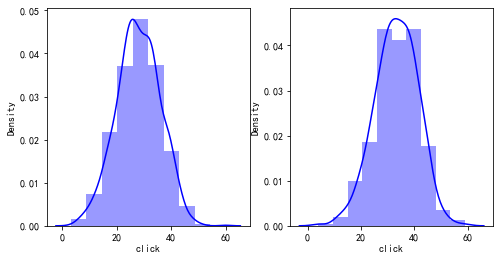

In [59]:
# ÂÖàÁîª‰∏™ÂõæÁúãÁúã
fig,axes = plt.subplots(nrows = 1,ncols = 2,figsize = (8,4))
sns.distplot(A['click'], color='b', bins=10, kde=True,ax = axes[0])
sns.distplot(B['click'], color='b', bins=10, kde=True,ax = axes[1])
# Â∫îËØ•ÊòØÊ≠£ÊÄÅÂàÜÂ∏É‰∫Ü

In [169]:
# ‰øùÈô©Ëµ∑ËßÅÔºåÂÜçÊ£ÄÈ™å‰∏Ä‰∏ã
print(stats.normaltest(A['click']))
print(stats.normaltest(B['click']))
#pÈÉΩËøúÂ§ß‰∫é0.05ÔºåÂèØ‰ª•ÂçÅÂàÜËÇØÂÆöÁöÑËÆ§‰∏∫Êï∞ÊçÆÊù•Ê∫ê‰∫éÊ≠£ÊÄÅÂàÜÂ∏É‰∫ÜÔºÅ

NormaltestResult(statistic=2.140346313210169, pvalue=0.3429491283702668)
NormaltestResult(statistic=4.227998494276426, pvalue=0.12075407409056058)


#### Êù°‰ª∂2ÔºöÊñπÂ∑ÆÈΩêÊÄßÊ£ÄÈ™å

‚ÄúÊñπÂ∑ÆÈΩêÊÄßÊ£ÄÈ™å‚ÄùÂ∞±ÊòØÊ£ÄÈ™å‰∏§‰∏™Ê†∑Êú¨ÂêÑËá™ÊâÄ‰ª£Ë°®ÁöÑÊ≠£ÊÄÅÊÄª‰ΩìÁöÑÊñπÂ∑ÆÁöÑÂ∑ÆÂºÇÊòØÂê¶ÊòæËëó„ÄÇ

In [170]:
stats.levene(A['click'],B['click'])
# p = 0.9> 0.05,Êª°Ë∂≥ÊñπÂ∑ÆÈΩêÊÄß

LeveneResult(statistic=0.0038118890892118724, pvalue=0.9507750290150789)

#### Áªà‰∫éÂèØ‰ª•ËøõË°åtÊ£ÄÈ™å‰∫ÜÔºÅ

ËÆæ$X_1$Ôºå$X_2$ÂàÜÂà´Ë°®Á§∫Áî®Êà∑ÊµèËßàÈ°µÈù¢AÁöÑÊÄªÁÇπÂáªÈáè‰ª•ÂèäÊµèËßàÈ°µÈù¢BÁöÑÊÄªÁÇπÂáªÈáè„ÄÇÁî±ÂâçÈù¢ÁöÑÊ≠£ÊÄÅÊÄßÊ£ÄÈ™å‰∏éÊñπÂ∑ÆÈΩêÊÄßÊ£ÄÈ™åÔºåÊàë‰ª¨ÂèØ‰ª•ËØ¥Ôºö

<center>$X_1\sim N(\mu_1,\sigma_1^2)$Ôºå$X_2\sim N(\mu_2,\sigma_2^2)$.ÂÖ∂‰∏≠$\sigma_1^2 = \sigma_2^2$.<center>
    
Áé∞Âú®Êàë‰ª¨Ë¶ÅÂà©Áî®tÊ£ÄÈ™åÔºåÊ†πÊçÆÂ∑≤ÊúâÁöÑÊ†∑Êú¨Â∫èÂàóÔºåÊ£ÄÈ™åÊòØÂê¶$\mu_2 > \mu_1$

‰∏ãÈù¢ÂÅöÂá∫ÂÅáËÆæ:$$H_1:\mu_1 <= \mu_2$$ $$H_0: \mu_1 > \mu_2$$

ÂàôÊãíÁªùÂüü‰∏∫$W = \{t >= t_1-\alpha(m+n-2)\}$,Âèñ$\alpha = 0.05$

In [171]:
# ËÆ°ÁÆóÊ£ÄÈ™åÁªüËÆ°Èáèt
m1 = A['click'].mean()
m2 = B['click'].mean()
sw = np.sqrt((((A['click'] - m1)**2).sum() + ((B['click'] - m2)**2).sum()) / (1 / (A['click'].shape[0] + B['click'].shape[0] -2)))
t = (m1 - m2) / (sw * (np.sqrt((1/A['click'].shape[0])+(1/B['click'].shape[0]))))
t

-0.005633080744860849

In [172]:
# Êü•ÊâæÊ≠£ÊÄÅÂàÜÂ∏ÉÁöÑ0.05ÂàÜ‰ΩçÊï∞
t_alpha = stats.t.ppf(0.95,A['click'].shape[0] + B['click'].shape[0]-2)
t_alpha

1.6455381384315175

ÂàôÊãíÁªùÂüü‰∏∫$W = \{t >= 1.65\}$,Ê£ÄÈ™åÁªüËÆ°Èáè$t = -0.0056$Ê≤°ÊúâËêΩÂÖ•ÊãíÁªùÂüüÔºåÊé•ÂèóÂéüÂÅáËÆæÔºåÂç≥Êàë‰ª¨ËÆ§‰∏∫BÈ°µÈù¢ÁöÑÂπ≥ÂùáÁÇπÂáªÈáèÊòØÈ´ò‰∫éAÈ°µÈù¢ÁöÑ„ÄÇ

#### ËÆ°ÁÆóÊïàÂ∫îÈáèÔºàÁßëÊÅ©DÂÄºÔºâ

In [173]:
mean1 = A['click'].mean()
mean2 = B['click'].mean()
std1 = A['click'].std()
std2 = B['click'].std()
n1 = A.shape[0]
n2 = B.shape[0]
s = np.sqrt(    ((n1-1) * std1 ** 2   +      (n2-1) *std2 ** 2    )    /     (n1+n2-2))
d = (mean1 - mean2) / s
d

-0.6555139905586295

## A/B Testing Êä•Âëä

**ÁªìËÆ∫Ôºö**

Êú¨Ê¨°A/B TestingÂÖ±track‰∫Ü‰∏§‰∏™ÊåáÊ†áÔºå‚ÄúËΩ¨ÂåñÁéá‚Äù‰∏é‚ÄúÁÇπÂáªÈáè‚ÄùÔºåÊù•Âà§Êñ≠BÈ°µÈù¢ÁöÑÁî®Êà∑ËΩ¨ÂåñË°®Áé∞„ÄÇ

1. ÂØπ‰∫éAÈ°µÈù¢‰∏éBÈ°µÈù¢ÁöÑÁî®Êà∑‚ÄúËΩ¨ÂåñÁéá‚Äù‰πãÈó¥ÁöÑÊØîËæÉÊàë‰ª¨ÈááÂèñ‰∫ÜzÊ£ÄÈ™åÔºåÂæóÂà∞ÁöÑÁªìËÆ∫Â¶Ç‰∏ãÔºö

    - Ê£ÄÈ™åÁªüËÆ°Èáè $ùëß = -2.418$ ËêΩÂÖ•ÊãíÁªùÂüüÔºåÂàôÊãíÁªùÂéüÂÅáËÆæÔºåÂç≥Êàë‰ª¨ËÆ§‰∏∫BÈ°µÈù¢ÁöÑÁî®Êà∑ËΩ¨ÂåñÁéáÊòØÈ´ò‰∫éAÈ°µÈù¢ÁöÑ„ÄÇ
    - ‰ΩÜÂÄºÂæóÊ≥®ÊÑèÁöÑÊòØÔºåÁßëÊÅ©DÂÄº = -0.123ËøáÂ∞èÔºåÊàë‰ª¨ÂÖ≥‰∫é‚ÄúËΩ¨ÂåñÁéá‚ÄùÁöÑÂÅáËÆæÊ£ÄÈ™åÁº∫‰πè‰ΩøÁî®‰ª∑ÂÄº„ÄÇ
    
2. ÂØπ‰∫éAÈ°µÈù¢‰∏éBÈ°µÈù¢ÁöÑÁî®Êà∑‚ÄúÁÇπÂáªÈáè‚Äù‰πãÈó¥ÁöÑÊØîËæÉÊàë‰ª¨ÈááÂèñ‰∫ÜtÊ£ÄÈ™åÔºåÂæóÂà∞ÁöÑÁªìËÆ∫Â¶Ç‰∏ãÔºö
    - Ê£ÄÈ™åÁªüËÆ°Èáè$t = ‚àí0.0056$Ê≤°ÊúâËêΩÂÖ•ÊãíÁªùÂüüÔºåÊé•ÂèóÂéüÂÅáËÆæÔºåÂç≥Êàë‰ª¨ËÆ§‰∏∫BÈ°µÈù¢ÁöÑÂπ≥ÂùáÁÇπÂáªÈáèÊòØÈ´ò‰∫éAÈ°µÈù¢ÁöÑ„ÄÇ
    - ‰ΩÜÂÄºÂæóÊ≥®ÊÑèÁöÑÊòØÔºåÁßëÊÅ©DÂÄº = -0.655ËøáÂ∞èÔºåÊàë‰ª¨ÂÖ≥‰∫é‚ÄúÁÇπÂáªÈáè‚ÄùÁöÑÂÅáËÆæÊ£ÄÈ™åÁº∫‰πè‰ΩøÁî®‰ª∑ÂÄº„ÄÇ
    
**Âª∫ËÆÆÔºö**

BÈ°µÈù¢Êó†ËÆ∫ÊòØÂú®Áî®Êà∑‚ÄúËΩ¨ÂåñÁéá‚ÄùËøòÊòØÂú®‚ÄúÁÇπÂáªÁéá‚Äù‰∏äÈÉΩ‰ºò‰∫éAÈ°µÈù¢„ÄÇËØ¥ÊòéBÈ°µÈù¢ÂØπÁî®Êà∑Êõ¥ÂÖ∑ÊúâÂê∏ÂºïÂäõÔºåÂπ∂‰∏îÊõ¥ÊúâÂà©‰∫é‰øÉÊàêÁî®Êà∑ÁöÑË¥≠‰π∞Ë°å‰∏∫„ÄÇÂõ†Ê≠§ÂèØ‰ª•ËÄÉËôëÁªßÁª≠Êâ©Â§ßBÈ°µÈù¢ÁöÑÂÆûÈ™åËåÉÂõ¥„ÄÇ